In [1]:
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats

In [35]:
# n2n: 2-dimensional search
inputDirs = {'n2n': '../../train/recon/n2n_2d/encoder_decoder/'}
inputSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [36]:
paramList = {}
rmseList = {}
ssimList = {}
for k in inputDirs:
    subDirs = glob.glob(os.path.join(inputDirs[k], '*'))
    
    params = []
    rmses = []
    ssims = []
    
    for subDir in subDirs:
        try:
            token = os.path.basename(subDir).split('_')
            gamma = float(token[0])
            sigma = float(token[1])
        except:
            continue
            
        params.append([gamma, sigma])
        for inputSlice in inputSlices:
            rmse = np.load(os.path.join(subDir, str(inputSlice), 'loss.npz'))['val'][-1,-1]
            rmses.append(rmse)
            
            ssim = np.load(os.path.join(subDir, str(inputSlice), 'ssim.npy'))
            ssims.append(ssim)
    
    params = np.array(params)
    rmses = np.reshape(np.array(rmses), (params.shape[0],-1))
    ssims = np.reshape(np.array(ssims), (params.shape[0],-1))

    paramList[k] = params
    rmseList[k] = np.mean(rmses,-1)
    ssimList[k] = np.mean(ssims,-1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


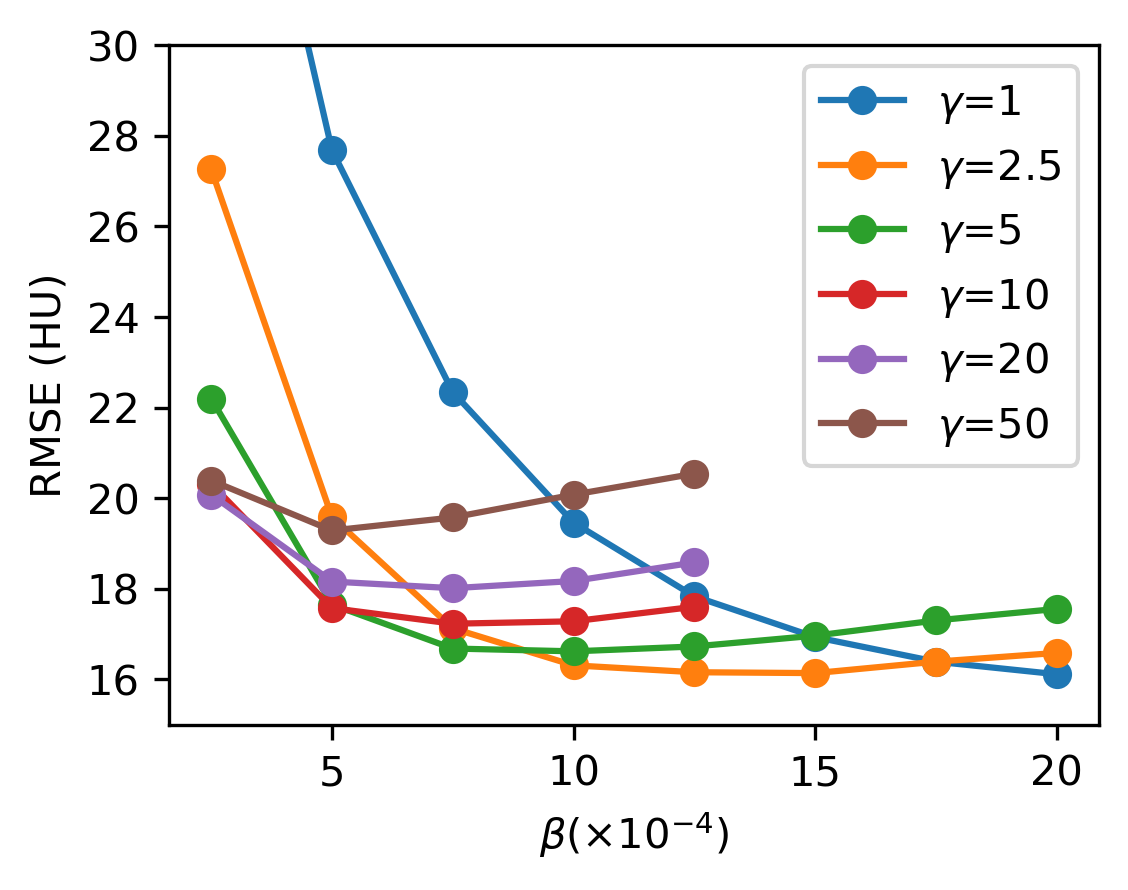

In [40]:
plt.figure(figsize=(4,3), dpi=300)
sigmas = np.unique(paramList['n2n'][:, 1])
for sigma in sigmas[1:]:
    inds = np.where(paramList['n2n'][:, 1] == sigma)[0]
    gammas = params[inds, 0]
    inds2 = np.argsort(gammas)
    gammas = gammas[inds2]
    rmses = rmseList['n2n'][inds][inds2]
        
    plt.plot(gammas * 10000, rmses * 1000, 'o-')

plt.legend([r'$\gamma$=%g'%s for s in sigmas[1:]])
plt.ylim([15, 30])
plt.xlabel(r'$\beta (\times 10^{-4})$')
plt.ylabel('RMSE (HU)')
# plt.title('Beta')

plt.savefig('../../train/recon/eval/gamma_beta.eps')

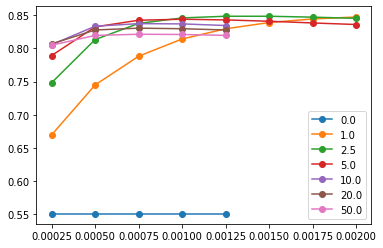

In [38]:
plt.figure()
sigmas = np.unique(paramList['n2n'][:, 1])
for sigma in sigmas:
    inds = np.where(paramList['n2n'][:, 1] == sigma)[0]
    gammas = params[inds, 0]
    inds2 = np.argsort(gammas)
    gammas = gammas[inds2]
    ssims = ssimList['n2n'][inds][inds2]
    
    plt.plot(gammas, ssims, 'o-')

plt.legend(sigmas)
# plt.ylim([1.5e-2, 3e-2])

In [62]:
# depth comparison
inputDir = '../../train/recon/n2n_2d/encoder_decoder_depth_study/'
inputSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [63]:
depths = [1,2,3,4,5]
rmseList = []
for depth in depths:
    rmses = []
    for iSlice in inputSlices:
        rmse = np.load(os.path.join(inputDir, str(depth), str(iSlice), 'loss.npz'))['val'][-1,-1]
        rmses.append(rmse)
    
    rmseList.append(np.mean(rmses))
rmseList = np.array(rmseList)

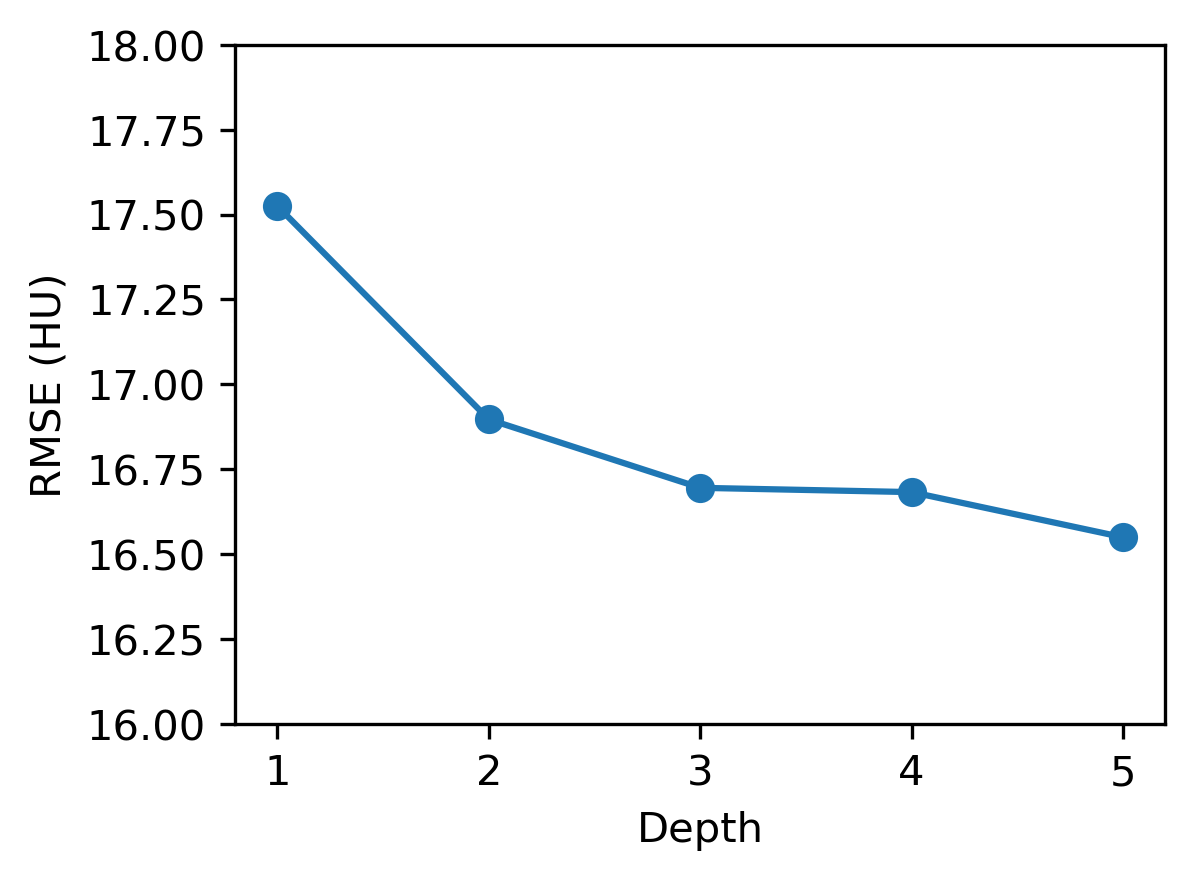

In [64]:
plt.figure(figsize=(4,3), dpi=300)
plt.plot(depths, rmseList * 1000, 'o-')
plt.xlabel('Depth')
plt.ylabel('RMSE (HU)')
plt.ylim([16, 18])
# plt.title('Network depth')

plt.savefig('../../train/recon/eval/depth.eps')

In [65]:
# subiter comparison
inputDir = '../../train/recon/n2n_2d/encoder_decoder_subIter_study//'
inputSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [66]:
subIters = [1,3,5,7,10]
rmseList = []
for subIter in subIters:
    rmses = []
    for iSlice in inputSlices:
        rmse = np.load(os.path.join(inputDir, str(subIter), str(iSlice), 'loss.npz'))['val'][-1,-1]
        rmses.append(rmse)
    
    rmseList.append(np.mean(rmses))
rmseList = np.array(rmseList)

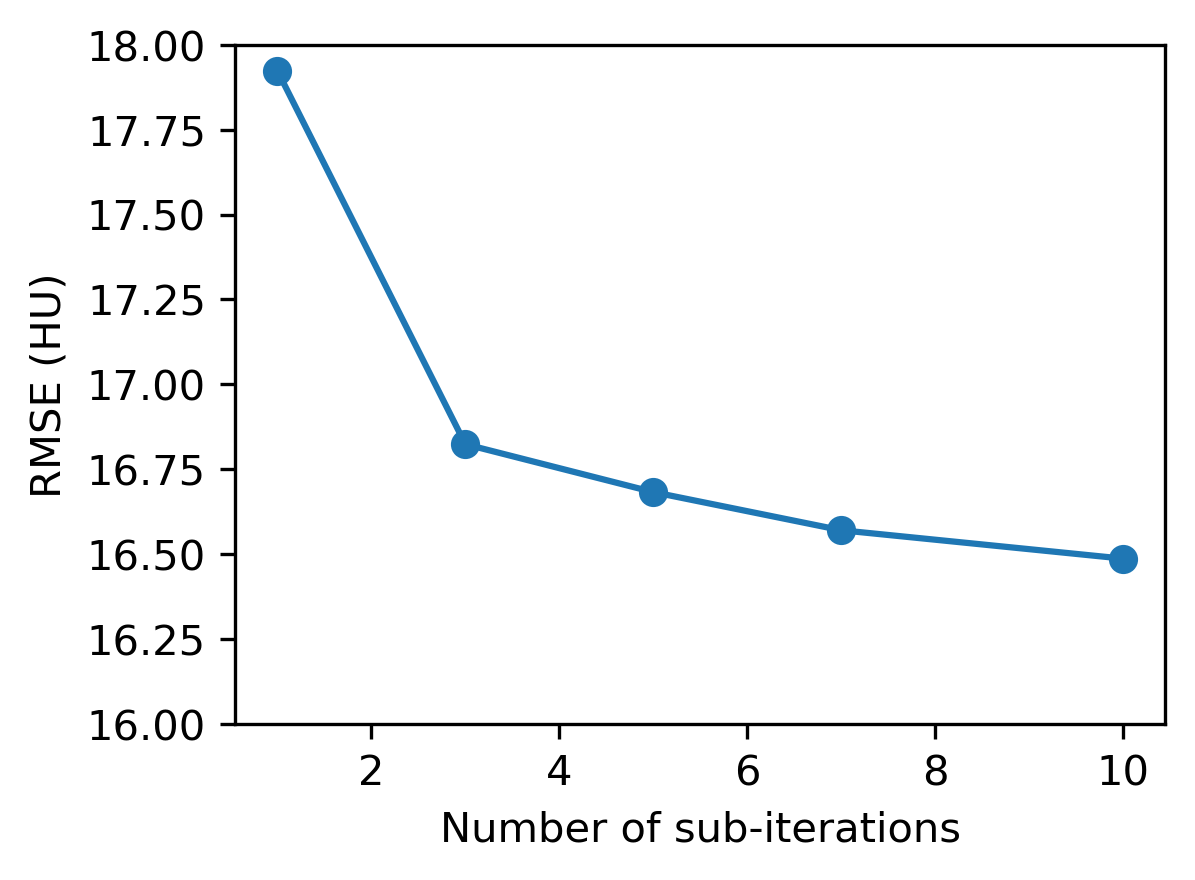

In [67]:
plt.figure(figsize=(4,3), dpi=300)

plt.plot(subIters, rmseList * 1000, 'o-')
plt.xlabel('Number of sub-iterations')
plt.ylabel('RMSE (HU)')
plt.ylim([16, 18])
# plt.title('Adam subiter')

plt.savefig('../../train/recon/eval/subIter.eps')